---
title: "4 - Polimorfismo"
toc: true
---

## Introducción

El término polimorfismo tiene origen en las palabras _poly_ (muchos) y _morfo_ (formas). Aplicado a la programación hace referencia a que los objetos pueden tomra diferentes formas.

Pero, ¿qué significa que los objetos pueden tomar diferentes formas? En el contexto de programación orientada a objetos significa que los objetos pueden responder a una misma operación de distintas maneras.

Tomemos, por ejemplo, la suma de dos variables:

```python
a + b
```

Si `a` y `b` son de tipo `int`, la operación está definida y devuelve otro `int`.
Si son de tipo `list`, la operación también está definida y devuelve un nuevo objeto `list`.
Así, diferentes tipos de datos, responden al mismo mensaje (la suma) de maneras distintas.

## Ejemplos

A lo largo de esta sección vamos a introducirnos en el polimorfismo mediante diferentes ejemplos.

### Animales que hablan

En programación orientada a objetos (POO), el polimorfismo se refiere a la capacidad que tiene el programa de **invocar un mismo método en objetos distintos**, y que cada objeto responda de la forma que le corresponde según su propia implementación.

Por ejemplo, imaginemos que tenemos una colección de perros, gatos y pájaros, y que cada uno entiende algunos comandos básicos.
Si les pedimos a estas mascotas que hablen (es decir, si les enviamos el mensaje "habla"), los perros van a ladrar, los gatos van a maullar y los pájaros van a piar.

In [1]:
class Animal:
    def __init__(self, nombre):
        self.nombre = nombre

class Perro(Animal):
    def hablar(self): # <1>
        print(self.nombre, "dice ¡guau!") # <1>

class Gato(Animal):
    def hablar(self): # <2>
        print(self.nombre, "dice ¡miau!") # <2>

class Pajaro(Animal):
    def hablar(self): # <3>
        print(self.nombre, "dice ¡pio pio!") # <3>

1. Los perros dicen guau.
2. Los gatos dicen miau.
3. Los pájaros dicen pio pio.

Como todos los animales tienen la capacidad de hablar, podemos recorrer una lista de animales y ejecutar el método `hablar` en cada uno de ellos, sin importar de qué tipo de animal se trate. Todos podrán responder a la llamada, cada uno a su manera.

In [2]:
mascotas = [
    Perro("Julio"),
    Gato("Micha"),
    Perro("Justo"),
    Pajaro("Pedrito")
]

for mascota in mascotas:
    mascota.hablar()

Julio dice ¡guau!
Micha dice ¡miau!
Justo dice ¡guau!
Pedrito dice ¡pio pio!


::: {.callout-note}

##### ¿Enviar un mensaje?

En el contexto de la programación orientada a objetos se suele usar la expresión "enviar un mensaje" cuando hablamos de que un programa (también llamado cliente) llama a un método de un objeto o invoca una operación sobre el mismo. Por ejemplo:

```python
objeto.correr() # Se envía el mensaje correr
obj + obj2      # Se envía el mensaje de suma (__add__)
```

Lo que el objeto haga al recibir ese mensaje depende exclusivamente de él.
Con el polimorfismo, podemos enviar el mismo mensaje a varios objetos,
y cada uno va a reaccionar de manera diferente según cómo fue diseñado y según los datos que tenga disponibles.

:::

### La forma es lo de menos

Podemos retomar el ejemplo de los rectángulos y circulos del apunte anterior.
Ambos tienen acceso al método `area` que devuelve el área de la figura.

In [3]:
import math

class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def area(self):
        return self.base * self.altura

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"


class Circulo:
    def __init__(self, radio):
        self.radio = radio

    def area(self):
        return self.radio ** 2 * math.pi

    def resumen(self):
        return f"Circulo(radio={self.radio})"

Si contamos con un listado de rectángulos y círculos, podemos usar la función `sorted` junto a una función anónima para ordenar los elementos según su área.

In [4]:
formas = [
    Circulo(2),
    Rectangulo(3, 2),
    Circulo(1.4),
    Rectangulo(4, 3),
    Rectangulo(6, 4),
]

# Ordenar
formas_ordenadas = sorted(formas, key=lambda f: f.area())

# Imprimir formas en orden
for forma in formas_ordenadas:
    print(forma.resumen(), forma.area(), sep=": ")

Rectangulo(base=3, altura=2): 6
Circulo(radio=1.4): 6.157521601035993
Rectangulo(base=4, altura=3): 12
Circulo(radio=2): 12.566370614359172
Rectangulo(base=6, altura=4): 24


Cuando la función anónima recibe una forma `f`, ejecuta su método `area` sin importar de qué tipo sea.
Como tanto rectángulos como círculos **saben cómo responder** a esa llamada devolviendo un número, pueden ordenarse correctamente según ese valor.

Aunque ambos métodos devuelvan el mismo tipo de resultado (un número), **la forma en que se calcula** ese resultado es distinta y depende de cada figura geométrica. De eso se trata el polimorfismo.

## Métodos mágicos

El polimorfismo no solo se da con métodos regulares como `hablar` o `area`.
Realmente, la magia del polimorfismo aparece cuando incorporamos los **métodos mágicos** de Python en nuestras clases.

Los métodos mágicos —también llamados _dunder methods_ (por "double underscore")— son métodos especiales que permiten que nuestros objetos participen en operaciones estándar del lenguaje, como comparaciones, sumas, conversiones a cadenas o iteraciones.

Por ejemplo, si intentamos comparar dos rectángulos creados con nuestra clase `Rectangulo`, incluso si tienen las mismas dimensiones, la comparación devolverá `False`.

In [5]:
r1 = Rectangulo(3, 2)
r2 = Rectangulo(3, 2)

r1 == r2

False

Conceptualmente, tiene sentido esperar que la comparación en valor de dos rectángulos de iguales dimensiones sea `True`.
Pero obtenemos `False`.

Esto no ocurre porque `r1` y `r2` representen objetos distintos, sino porque todavía no hemos implementado el método mágico que define como se deben comparar objetos de la clase `Rectangulo` por valor.

### Comparaciones

En Python, el operador de comparación por valor `==` utiliza internamente el método mágico `__eq__`.
Si queremos comparar rectángulos con `==`, entonces debemos implementar `__eq__`.

In [6]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    @property
    def area(self):
        return self.base * self.altura

    def __eq__(self, other): # <1>
        if self.base == other.base and self.altura == other.altura: # <2>
            return True # <2>
        return False # <3>

1. El método `__eq__` recibe siempre **dos objetos** a comparar, llamados por convención `self` y `other`.
2. Si las bases y las alturas de los objetos son iguales, devuelve `True`, ya que consideramos que los rectángulos son iguales.
3. En caso contrario, devuelve `False`, indicando que los rectángulos no son iguales.

Si probamos nuestro método de comparación recién implementado, vemos que funciona correctamente:

In [7]:
r1 = Rectangulo(3, 2)
r2 = Rectangulo(3, 2)
r3 = Rectangulo(5, 3)

In [8]:
r1 == r3

False

In [9]:
r2 == r3

False

In [10]:
r1 == r2

True

No solo tenemos acceso al operador `==`, ahora también podemos usar `!=`.

In [11]:
r1 != r3

True

Todos los operadores de comparación se corresponden con un método especial determinado.
La tabla a continuación incluye el nombre del método, el operador binario que utulizamos y una descripción de cómo funciona.

| Método                | Operador asociado | Descripción                                        |
| --------------------- | :---------------: | -------------------------------------------------- |
| `__eq__(self, other)` | `==`              | `True` si `self` es igual a `other`.               |
| `__ne__(self, other)` | `!=`              | `True` si `self` **no** es igual a `other`.        |
| `__lt__(self, other)` | `<`               | `True` si `self` es **menor** que `other`.         |
| `__le__(self, other)` | `<=`              | `True` si `self` es **menor o igual** que `other`. |
| `__gt__(self, other)` | `>`               | `True` si `self` es **mayor** que `other`.         |
| `__ge__(self, other)` | `>=`              | `True` si `self` es **mayor o igual** que `other`. |

: {.striped .hover tbl-colwidths="[25, 25, 50]"}

Debajo incorporamos todos estos métodos en nuestra clase `Rectangulo`.
No existe un criterio universal para determinar si un rectángulo es menor o mayor a otro.
En nuestro caso, con el objetivo de mostrar la implementación de estos métodos, podemos decir que un rectángulo es menor a otro si su área es menor.

In [12]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    @property
    def area(self):
        return self.base * self.altura

    def __eq__(self, other):
        return self.base == other.base and self.altura == other.altura

    def __lt__(self, other):
        return self.area < other.area

    def __le__(self, other):
        return self.area <= other.area

    def __gt__(self, other):
        return self.area > other.area

    def __ge__(self, other):
        return self.area >= other.area

In [13]:
r1 = Rectangulo(3, 5) # Área: 15
r2 = Rectangulo(3, 4) # Área: 12
r3 = Rectangulo(5, 3) # Área: 15

In [14]:
r1 < r2

False

In [15]:
r1 < r3

False

In [16]:
r1 <= r3

True

In [17]:
r3 > r2

True

In [18]:
r1 == r2

False

In [19]:
r1 == r3 # No son iguales porque sus dimensiones no lo son.

False

### Apariencias

Además de los operadores de comparación, muchas funciones _built-in_ de Python utilizan métodos mágicos internamente.
Una de las más comunes es `repr()`, que se encarga de devolver una **representación** de un objeto cuando se lo muestra en pantalla.
Para personalizar esa representación en nuestras clases, debemos implementar el método mágico `__repr__`.

In [20]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def __repr__(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

In [21]:
r1 = Rectangulo(5, 3.5)
r1

Rectangulo(base=5, altura=3.5)

También `str` utiliza internamente un método especial llamado `__str__`, que define cómo debe mostrarse un objeto cuando se convierte a texto de forma legible.

In [22]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def __repr__(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

    def __str__(self):
        return f"Rectángulo de base {self.base} y altura {self.altura}"

In [23]:
r1 = Rectangulo(5, 3.5)
r1

Rectangulo(base=5, altura=3.5)

In [24]:
print("repr:", repr(r1))
print("str:", str(r1))

repr: Rectangulo(base=5, altura=3.5)
str: Rectángulo de base 5 y altura 3.5


::: {.callout-note}
##### Diferencia entre `__repr__` y `__str__`

Aunque ambos métodos devuelven una representación en texto de un objeto, tienen propósitos distintos:

* `__repr__` busca ofrecer una representación **precisa y detallada**, útil para desarrolladores.
Idealmente, debería ser lo más cercana posible al código necesario para reconstruir el objeto.
* `__str__`, en cambio, devuelve una representación más **legible y amigable**, pensada para usuarios finales o para mostrar el objeto en interfaces y mensajes.

Por ejemplo:

```python
from datetime import datetime

d = datetime(2025, 10, 7, 17, 30)
print("repr:", repr(d))
print("str:", str(d))
```
```cmd
repr: datetime.datetime(2025, 10, 7, 17, 30)
str: 2025-10-07 17:30:00
```

:::

### Aritmética

Finalmente, retomamos el ejemplo de la introducción del apunte, que tanto hemos mencionado a lo largo del curso: la suma de objetos.

Resulta que el operador de suma `+` utiliza internamente el método especial `__add__`.
Gracias a esto, también podemos definir cómo deben sumarse dos objetos de una clase que nosotros creamos.

Por ejemplo, supongamos una clase que representa vectores en dos dimensiones, inicializada con valores para `x` e `y`.

La suma de dos vectores está definida componente a componente:

$$
\vec{u} + \vec{v} = (x_1 + x_2, y_1 + y_2)
$$

Y podemos implementar la clase de la siguiente manera:

In [25]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __repr__(self):
        return f"Vector({self.x}, {self.y})"

In [26]:
v = Vector(2, 2)
u = Vector(1, -0.5)
print(v)
print(u)

Vector(2, 2)
Vector(1, -0.5)


Gracias a la implementación de `__add__`, está definida la suma entre vectores:

In [27]:
v + u

Vector(3, 1.5)

Y como también implementamos `__repr__`, obtenemos una representación textual legible.

Todos los operadores aritméticos en Python utilizan internamente métodos especiales.
A continuación se muestran algunos de los más comunes:

| Método                      | Operador asociado | Descripción                      |
| --------------------------- | :---------------: | -------------------------------- |
| `__add__(self, other)`      | `+`               | Suma: `self + other`             |
| `__sub__(self, other)`      | `-`               | Resta: `self - other`            |
| `__mul__(self, other)`      | `*`               | Multiplicación: `self * other`   |
| `__truediv__(self, other)`  | `/`               | División real: `self / other`    |
| `__floordiv__(self, other)` | `//`              | División entera: `self // other` |
| `__mod__(self, other)`      | `%`               | Módulo: `self % other`           |
| `__pow__(self, other)`      | `**`              | Potencia: `self ** other`        |

: {.striped .hover tbl-colwidths="[35, 25, 40]"}

Considerando los vectores $\vec{u}$, $\vec{v}$ y el escalar $c$, podemos implementar las siguientes operaciones en nuestra clase `Vector`:

$$
\begin{aligned}
\vec{u} + \vec{v} &= (x_1 + x_2, y_1 + y_2) \\
\vec{u} - \vec{v} &= (x_1 - x_2, y_1 - y_2) \\
\vec{u} \times c &= (x_1 \times c, y_1 \times c) \\
\frac{\vec{u}}{c} &= \left(\frac{x_1}{c}, \frac{y_1}{c}\right) \\
\end{aligned}
$$

En Python:

In [28]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

    def __truediv__(self, scalar):
        return Vector(self.x / scalar, self.y / scalar)

    def __repr__(self):
        return f"Vector({self.x}, {self.y})"

Veamos algunos ejemplos:

In [29]:
u = Vector(1, -0.5)
v = Vector(2, 1)

In [30]:
u + v

Vector(3, 0.5)

In [31]:
u - v

Vector(-1, -1.5)

In [32]:
v - u 

Vector(1, 1.5)

In [33]:
u * 2.5

Vector(2.5, -1.25)

In [34]:
v / 4

Vector(0.5, 0.25)

Para finalizar, podemos usar la función `graficar_vectores`, que recibe una lista de vectores y los representa gráficamente en el plano, mostrando de forma visual el resultado de las operaciones realizadas.

In [35]:
#| code-fold: true

import matplotlib.pyplot as plt

def graficar_vectores(vectores):
    x_range = [0, 0]
    y_range = [0, 0]

    fig, ax = plt.subplots(figsize=(6, 5))

    for i, vector in enumerate(vectores):
        ax.quiver(
            0, 0, vector.x, vector.y,
            angles='xy',
            scale_units='xy',
            scale=1,
            color=f"C{i}",
            label=str(vector)
        )

        x_range[0] = min(x_range[0], vector.x)
        x_range[1] = max(x_range[1], vector.x)

        y_range[0] = min(y_range[0], vector.y)
        y_range[1] = max(y_range[1], vector.y)

    x_range[0] = x_range[0] - 0.5
    x_range[1] = x_range[1] + 0.5
    y_range[0] = y_range[0] - 0.5
    y_range[1] = y_range[1] + 0.5

    ax.axhline(0, color='k', linewidth=0.5)
    ax.axvline(0, color='k', linewidth=0.5)
    ax.set(xlim=x_range, ylim=y_range, xlabel="x", ylabel="y")
    ax.grid()
    ax.set_axisbelow(True)
    ax.legend(loc="upper left")
    plt.show()

Grafiquemos tres vectores cualesquiera:

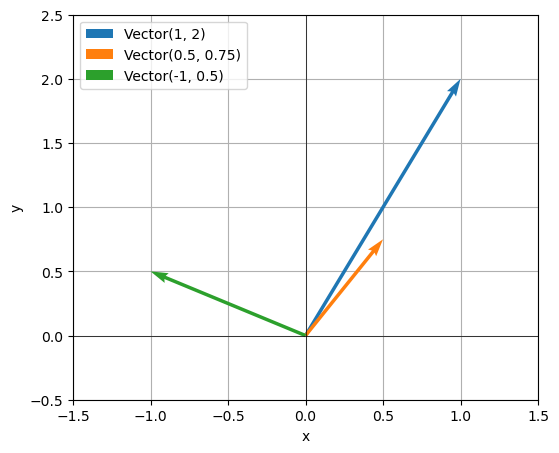

In [36]:
graficar_vectores(
    [
        Vector(1, 2),
        Vector(0.5, 0.75),
        Vector(-1, 0.5),
    ]
)

El vector $\vec{v}$ y su opuesto $-\vec{v}$:

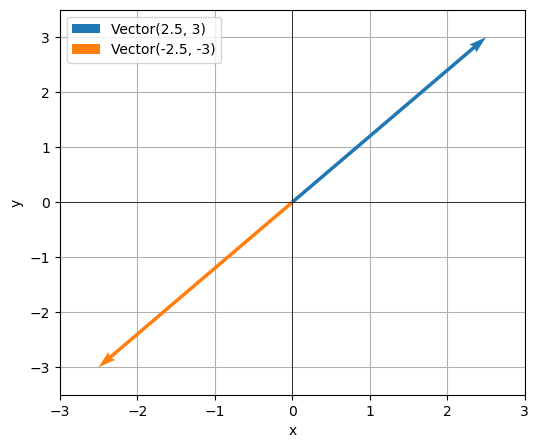

In [37]:
v = Vector(2.5, 3)

graficar_vectores([v, v * (-1)])

El vector $\vec{v}$ y $1.5 \times \vec{v}$:

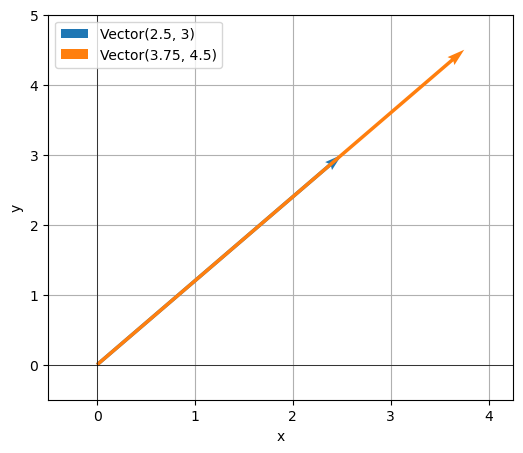

In [38]:
graficar_vectores([v, v * 1.5])

El vector $\vec{v}$ y $0.5 \times \vec{v}$:

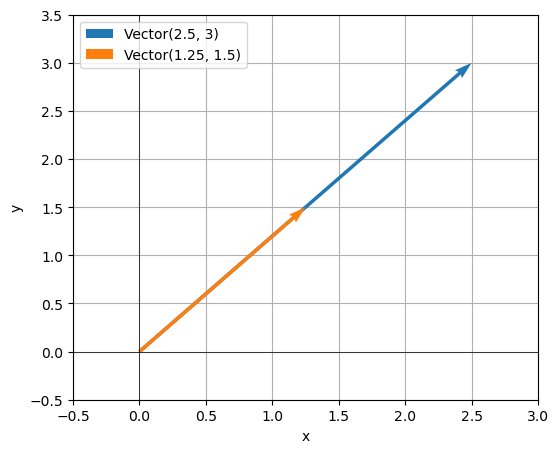

In [39]:
graficar_vectores([v, v * 0.5])

Los vectores $\vec{u}$, $\vec{v}$ y su suma:

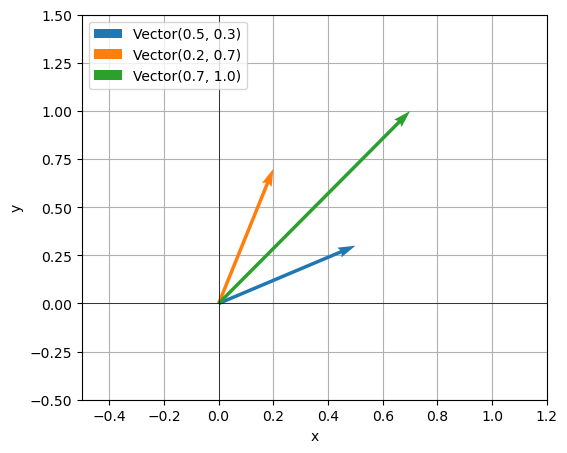

In [40]:
u = Vector(0.5, 0.3)
v = Vector(0.2, 0.7)

graficar_vectores([u, v, u + v])

Y ahora su resta:

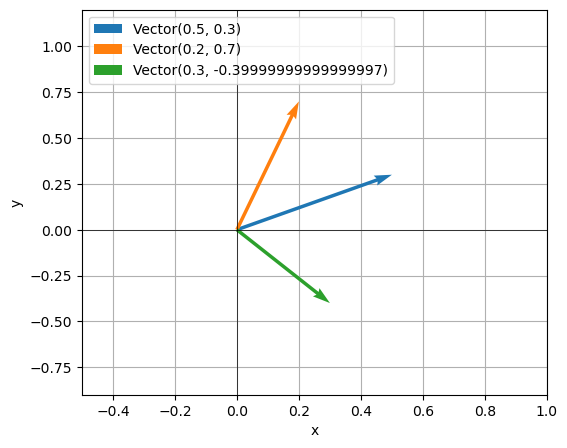

In [41]:
graficar_vectores([u, v, u - v])

::: {.callout-note}

##### Sobrecarga de operadores

A la capacidad de redefinir el comportamiento de los operadores estándar (como `+`, `-`, `==`, etc.) se la conoce como sobrecarga de operadores.

Gracias a ella, podemos escribir programas más expresivos, legibles e intuitivos, haciendo que nuestras clases se comporten como tipos nativos de Python.
:::


## Otros métodos

Los métodos mágicos que cubrimos en este apunte solo incluyen algúnos de los métodos disponibles.

Alguno de ellos se muestran a continuación:

| Método                       | Cómo se usa     | Descripción                                                       |
| -----------------------------| --------------- | ----------------------------------------------------------------- |
| `__neg__(self)`              | `-obj`          | Devuelve el valor negado del objeto.                              |
| `__pos__(self)`              | `+obj`          | Devuelve el valor positivo del objeto.                            |
| `__abs__(self)`              | `abs(obj)`      | Devuelve el valor absoluto del objeto.                            |
| `__len__(self)`              | `len(obj)`      | Devuelve la longitud del objeto.                                  |
| `__iter__(self)`             | `for x in obj`  | Devuelve un iterador.                                             |
| `__next__(self)`             | `next(obj)`     | Devuelve el siguiente elemento de un iterador.                    |
| `__contains__(self, item)`   | `item in obj`   | Comprueba pertenencia.                                            |
| `__call__(self, ...)`        | `obj()`         | Permite llamar a un objeto como si fuera función.                 |
| `__bool__(self)`             | `bool(obj)`     | Define si el objeto se considera `True` o `False`.                |
| `__hash__(self)`             | `hash(obj)`     | Permite usar el objeto en conjuntos y como clave en diccionarios. |

: {.striped .hover tbl-colwidths="[30, 20, 50]"}

Un recurso útil para explorar el funcionamiento de ellos es [Python Magic Methods de Real Python](https://realpython.com/python-magic-methods/).
El listado exhaustivo se puede encontrar en la [documentación oficial de Python](https://docs.python.org/3/reference/datamodel.html#special-method-names).